In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#importing data
train_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Bureau\Assignment_Train.csv")
test_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Bureau\Assignment_Test.csv")

In [3]:
train_df.shape

(10000, 55)

In [4]:
test_df.shape

(2000, 55)

In [5]:
train_df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [6]:
test_df.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


In [7]:
test_uid = test_df['UID']

In [8]:
print(train_df.isnull().sum())

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        854
FIRST NAME                                0
MIDDLE NAME                            7145
LAST NAME                               681
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                            4297
MOBILE VERIFICATION                       0
DEALER NAME                               4
TOTAL ASSET COST                       5108
ASSET CTG                              5108
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                         4894
GENDER                                    0
DOB                                       0
AGE                             

In [9]:
print(test_df.isnull().sum())

UID                                       0
DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           0
HDB BRANCH STATE                        172
FIRST NAME                                0
MIDDLE NAME                            1405
LAST NAME                               131
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                             842
MOBILE VERIFICATION                       0
DEALER NAME                               0
TOTAL ASSET COST                       1022
ASSET CTG                              1022
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                          981
GENDER                                    0
DOB                             

In [10]:
columns_to_drop = [
    "Phone Social Premium.a23games", "Phone Social Premium.my11", "Phone Social Premium.rummycircle", 
    "Phone Social Premium.yatra", "Phone Social Premium.jiomart", "Phone Social Premium.isWABusiness", 
    "Phone Social Premium.whatsapp", "MIDDLE NAME", "Phone Social Premium.instagram"
]
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [11]:
columns_to_impute = ["HDB BRANCH NAME", "HDB BRANCH STATE", "LAST NAME", "DEALER NAME", "MARITAL STATUS", "ADDRESS TYPE", "EMPLOY CONSTITUTION", "EMPLOYER NAME", "EMPLOYER TYPE", "Pan Name", "vpa", "upi_name", "ASSET CTG"]

train_df[columns_to_impute] = train_df[columns_to_impute].fillna("Unknown")
test_df[columns_to_impute] = test_df[columns_to_impute].fillna("Unknown")


In [12]:
train_df.dtypes

DEALER ID                                int64
APPLICATION LOGIN DATE                  object
HDB BRANCH NAME                         object
HDB BRANCH STATE                        object
FIRST NAME                              object
LAST NAME                               object
mobile                                   int64
AADHAR VERIFIED                         object
Cibil Score                             object
MOBILE VERIFICATION                       bool
DEALER NAME                             object
TOTAL ASSET COST                       float64
ASSET CTG                               object
ASSET MODEL NO                           int64
APPLIED AMOUNT                           int64
PRIMARY ASSET MAKE                      object
Primary Asset Model No                  object
Personal Email Address                  object
MARITAL STATUS                          object
GENDER                                  object
DOB                                      int64
AGE          

In [13]:
train_df['Cibil Score'] = pd.to_numeric(train_df['Cibil Score'], errors='coerce')
test_df['Cibil Score'] = pd.to_numeric(test_df['Cibil Score'], errors='coerce')

In [14]:
train_df['Cibil Score'].fillna(train_df['Cibil Score'].median(), inplace=True)
train_df['TOTAL ASSET COST'].fillna(train_df['TOTAL ASSET COST'].median(), inplace=True)

test_df['Cibil Score'].fillna(test_df['Cibil Score'].median(), inplace=True)
test_df['TOTAL ASSET COST'].fillna(test_df['TOTAL ASSET COST'].median(), inplace=True)

In [15]:
train_df['phone_digitalage'].fillna(train_df['phone_digitalage'].mode()[0], inplace=True)
train_df['phone_nameMatchScore'].fillna(train_df['phone_nameMatchScore'].mode()[0], inplace=True)
train_df['phone_phoneFootprintStrengthOverall'].fillna(train_df['phone_phoneFootprintStrengthOverall'].mode()[0], inplace=True)


test_df['phone_digitalage'].fillna(test_df['phone_digitalage'].mode()[0], inplace=True)
test_df['phone_nameMatchScore'].fillna(test_df['phone_nameMatchScore'].mode()[0], inplace=True)
test_df['phone_phoneFootprintStrengthOverall'].fillna(test_df['phone_phoneFootprintStrengthOverall'].mode()[0], inplace=True)

In [16]:
phone_social_columns = [
    "Phone Social Premium.amazon", "Phone Social Premium.byjus", "Phone Social Premium.flipkart", 
    "Phone Social Premium.housing", "Phone Social Premium.indiamart", "Phone Social Premium.jeevansaathi", 
    "Phone Social Premium.microsoft", "Phone Social Premium.paytm", "Phone Social Premium.shaadi", 
    "Phone Social Premium.skype", "Phone Social Premium.toi", "Phone Social Premium.zoho"
]

train_df[phone_social_columns] = train_df[phone_social_columns].fillna(0)
test_df[phone_social_columns] = test_df[phone_social_columns].fillna(0)

In [17]:
train_df['Application Status'] = train_df['Application Status'].map({'APPROVED': 1, 'DECLINED': 0})

In [18]:
print(train_df.isnull().sum())

DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
LAST NAME                              0
mobile                                 0
AADHAR VERIFIED                        0
Cibil Score                            0
MOBILE VERIFICATION                    0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME   

In [19]:
print(test_df.isnull().sum())

UID                                    0
DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
LAST NAME                              0
mobile                                 0
AADHAR VERIFIED                        0
Cibil Score                            0
MOBILE VERIFICATION                    0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUT

In [20]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

13
0


In [21]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [22]:
train_df.dtypes

DEALER ID                                int64
APPLICATION LOGIN DATE                  object
HDB BRANCH NAME                         object
HDB BRANCH STATE                        object
FIRST NAME                              object
LAST NAME                               object
mobile                                   int64
AADHAR VERIFIED                         object
Cibil Score                            float64
MOBILE VERIFICATION                       bool
DEALER NAME                             object
TOTAL ASSET COST                       float64
ASSET CTG                               object
ASSET MODEL NO                           int64
APPLIED AMOUNT                           int64
PRIMARY ASSET MAKE                      object
Primary Asset Model No                  object
Personal Email Address                  object
MARITAL STATUS                          object
GENDER                                  object
DOB                                      int64
AGE          

<Axes: xlabel='Application Status'>

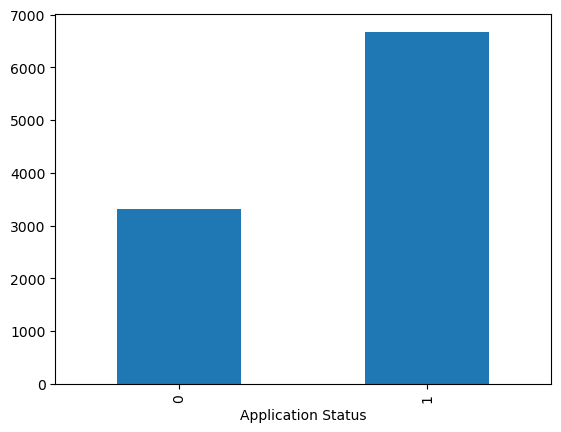

In [23]:
train_df.groupby('Application Status')['Application Status'].count().plot(kind='bar')

In [24]:
train_numeric=train_df.select_dtypes(include=['int64','float64'])
test_numeric = test_df.select_dtypes(include=['int64', 'float64'])

train_numeric.head()
test_numeric.head()

,UID,DEALER ID,mobile,Cibil Score,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,DOB,AGE,Phone Social Premium.amazon,...,Phone Social Premium.indiamart,Phone Social Premium.jeevansaathi,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore
0,1844045271814558464,105615,7019759674,757.0,95352.0,143241,88000,10081965,56,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,676,100.0
1,1840349097823778816,91593,7697884828,750.0,75371.0,166536,75000,1011980,42,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,897,-1.0
2,1488102613362294272,74152,8840079825,710.0,94983.0,134123,93000,28091996,25,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,839,100.0
3,555529923942874624,110164,8089276854,695.0,94535.5,143627,95000,14041988,34,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2050,-1.0
4,1010213070486150912,113037,9337511958,726.0,90277.0,143948,83000,1011998,24,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1,-1.0


In [25]:
#removing categorical
columns_to_remove = [
    "Phone Social Premium.amazon", "Phone Social Premium.byjus", "Phone Social Premium.flipkart", 
    "Phone Social Premium.housing", "Phone Social Premium.indiamart", "Phone Social Premium.jeevansaathi", 
    "Phone Social Premium.microsoft", "Phone Social Premium.paytm", "Phone Social Premium.shaadi", 
    "Phone Social Premium.skype", "Phone Social Premium.toi", "Phone Social Premium.zoho", "mobile", 
    "ASSET MODEL NO", "DOB", "DEALER ID"
]
train_numeric = train_numeric.drop(columns_to_remove, axis=1)
test_numeric = test_numeric.drop(columns_to_remove, axis=1)

In [26]:
train_numeric.head()
test_numeric.head()

,UID,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,AGE,phone_digitalage,phone_nameMatchScore
0,1844045271814558464,757.0,95352.0,88000,56,676,100.0
1,1840349097823778816,750.0,75371.0,75000,42,897,-1.0
2,1488102613362294272,710.0,94983.0,93000,25,839,100.0
3,555529923942874624,695.0,94535.5,95000,34,2050,-1.0
4,1010213070486150912,726.0,90277.0,83000,24,-1,-1.0


<Axes: >

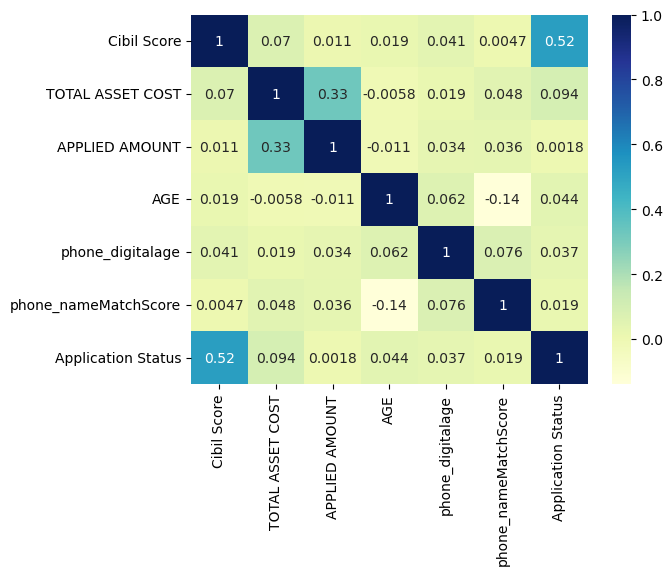

In [27]:
sns.heatmap(train_numeric.corr(), cmap='YlGnBu', annot=True)

In [28]:
train_categorical=train_df.select_dtypes(include='object')
test_categorical = test_df.select_dtypes(include='object')

In [29]:
new_columns = ["Phone Social Premium.amazon", "Phone Social Premium.byjus", "Phone Social Premium.flipkart", "Phone Social Premium.housing", "Phone Social Premium.indiamart", "Phone Social Premium.jeevansaathi", "Phone Social Premium.microsoft", "Phone Social Premium.paytm", "Phone Social Premium.shaadi", "Phone Social Premium.skype", "Phone Social Premium.toi", "Phone Social Premium.zoho"]
new_categorical = train_df[new_columns]
train_categorical = pd.concat([train_categorical, new_categorical], axis=1)
test_categorical = pd.concat([test_categorical, test_df[new_columns]], axis=1)

In [30]:
#creating dummies
train_dummies=pd.get_dummies(train_categorical, drop_first=True)
test_dummies = pd.get_dummies(test_categorical, drop_first=True)

train_dummies.head()
test_dummies.head()

,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.jeevansaathi,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,...,upi_name_Yashoda,upi_name_Yogesh Kumar,upi_name_Yuvraj,upi_name_ZAKEER HUSSAIN,upi_name_ZEESHAN,upi_name_ZISHAN SO ASHRAF ALAM,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [31]:
train_final=pd.concat([train_numeric, train_dummies], axis =1)
test_final = pd.concat([test_numeric, test_dummies], axis=1)
test_final = test_final.reindex(columns=train_final.columns, fill_value=0)

train_final.head()
test_final.head()

,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,AGE,phone_digitalage,phone_nameMatchScore,Application Status,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,...,upi_name_ZAREENA SULTANA,upi_name_ZEESHAN AHMAD,upi_name_ZIAUL HAK,upi_name_ZIYARUL SHAIKH,upi_name_Zakir Hussain,upi_name_divyanshi chayal,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,757.0,95352.0,88000,56,676,100.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,False,True,False,False
1,750.0,75371.0,75000,42,897,-1.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,True,False,False,False
2,710.0,94983.0,93000,25,839,100.0,0,1.0,0.0,1.0,...,0,0,0,0,0,0,False,True,False,False
3,695.0,94535.5,95000,34,2050,-1.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,True,False,False,False
4,726.0,90277.0,83000,24,-1,-1.0,0,1.0,0.0,1.0,...,0,0,0,0,0,0,False,False,False,True


In [32]:
x = train_final.drop('Application Status', axis=1)
y = train_final['Application Status']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# Logistic Regression

In [34]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8518518518518519
Precision: 0.934001670843776
Recall: 0.8374531835205993
F1 Score: 0.8830963665086888


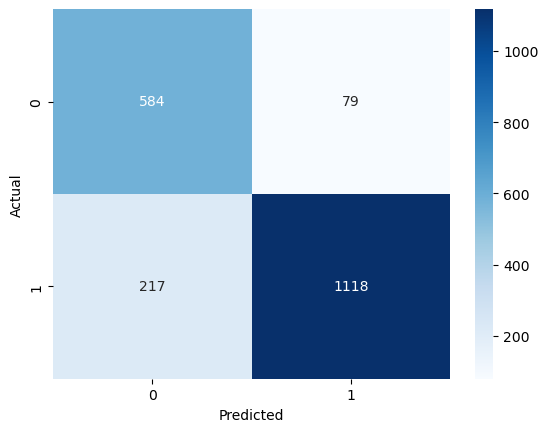

In [35]:
# Predict on the validation set
y_pred = log_model.predict(x_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using Selected K(4) Best Features

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

key_features=SelectKBest(score_func=f_classif, k=4)
x_train_selected= key_features.fit_transform(x_train,y_train)

selected_indices=key_features.get_support(indices=True)
selected_features=x_train.columns[selected_indices]

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   84   119   234 ... 43947 43949 43950] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [37]:
selected_indices

array([10599, 17246, 19582, 20944], dtype=int64)

In [38]:
xtrain=x_train[selected_features]

In [39]:
xtrain.columns

Index(['ASSET CTG_Unknown', 'EMPLOY CONSTITUTION_Unknown',
       'EMPLOYER NAME_Unknown', 'EMPLOYER TYPE_Unknown'],
      dtype='object')

In [40]:
xtest=x_test[selected_features]

In [41]:
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(xtrain, y_train)

LogisticRegression(max_iter=1000)

In [42]:
model.score(xtrain, y_train)

0.8253849042433345

# KNN Algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn_model.fit(xtrain,y_train)

KNeighborsClassifier(metric='euclidean')

K-Nearest Neighbors:
Accuracy: 0.8253253253253253
Precision: 0.9900596421471173
Recall: 0.7460674157303371
F1 Score: 0.8509184109354977


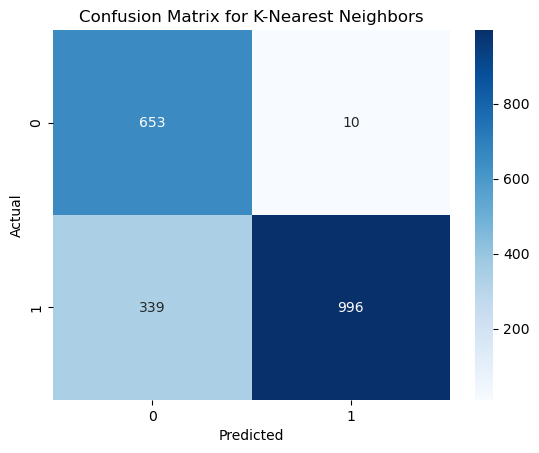

In [44]:
knn_predicted = knn_model.predict(xtest)

# Evaluation metrics
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predicted))
print("Precision:", precision_score(y_test, knn_predicted))
print("Recall:", recall_score(y_test, knn_predicted))
print("F1 Score:", f1_score(y_test, knn_predicted))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predicted)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtree_model=DecisionTreeClassifier(max_depth=5)

dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

Decision Tree:
Accuracy: 0.8703703703703703
Precision: 0.8644986449864499
Recall: 0.9558052434456928
F1 Score: 0.9078619708288865


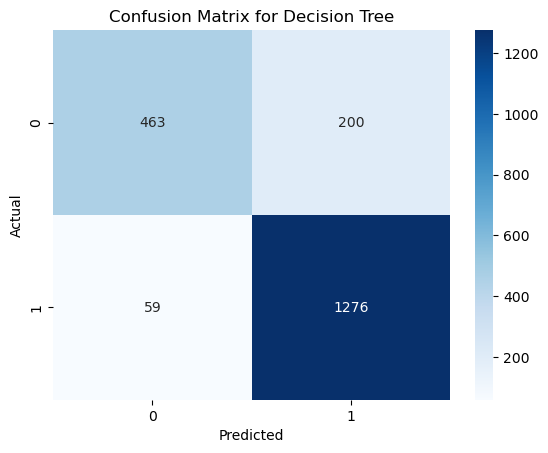

In [46]:
dtree_predicted = dtree_model.predict(x_test)

# Evaluation metrics
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dtree_predicted))
print("Precision:", precision_score(y_test, dtree_predicted))
print("Recall:", recall_score(y_test, dtree_predicted))
print("F1 Score:", f1_score(y_test, dtree_predicted))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, dtree_predicted)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier(n_estimators=100)

rfc_model.fit(x_train, y_train)

RandomForestClassifier()

Random Forest:
Accuracy: 0.8468468468468469
Precision: 0.9715857011915674
Recall: 0.7940074906367042
F1 Score: 0.8738664468260512


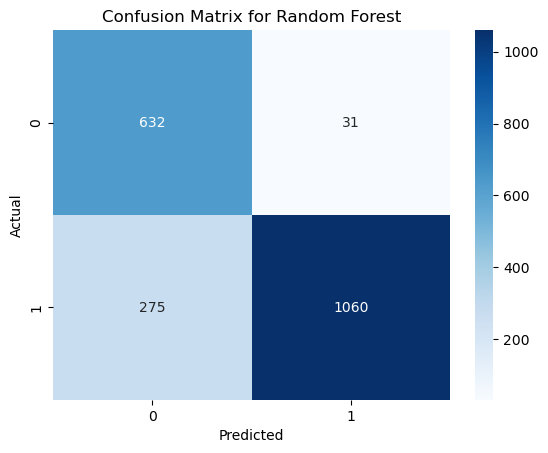

In [48]:
rfc_predicted = rfc_model.predict(x_test)

# Evaluation metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rfc_predicted))
print("Precision:", precision_score(y_test, rfc_predicted))
print("Recall:", recall_score(y_test, rfc_predicted))
print("F1 Score:", f1_score(y_test, rfc_predicted))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_predicted)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Using Decision Tree Classifier for final predictions
dtree_predictions = dtree_model.predict(test_final.drop('Application Status', axis=1, errors='ignore'))

# Creating the submission DataFrame
submission = pd.DataFrame({'UID': test_uid, 'Prediction': dtree_predictions})

# Saving the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)